# FEM solution to 

$ 
 -\left(\dfrac{\partial ^2v}{\partial r^{2}} + 
\dfrac{1}{r}\,\dfrac{\partial v}{\partial r} + \dfrac{\partial ^2v}{\partial {z^2}}   \right) = f
$ 

with Dirichlet condition $v = 0$ on the border of a disk $D$  

In [3]:
import mshr
from dolfin import *
import matplotlib.pyplot as plt
import numpy as np

## The mesh

The make up of region $D$ using the library *mshr*

[Take a look at mhsr API](https://bitbucket.org/fenics-project/mshr/wiki/API)

In [4]:
domain = mshr.Circle(Point(1.5,0), 1)

In [5]:
mesh = mshr.generate_mesh(domain, 20)

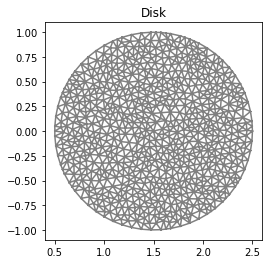

In [6]:
plot(mesh, title="Disk")

## Weak formulation of the problem

[See FENICS PR](https://fenicsproject.org/)

In [7]:
V = FunctionSpace(mesh, "Lagrange", 2)

Calling FFC just-in-time (JIT) compiler, this may take some time.


In [8]:
def boundary(x, on_boundary):
    return on_boundary

In [9]:
bc = DirichletBC(V, Constant(0.0), boundary)

In [10]:
u0 = Constant(0.0)
weight = Constant(5.0)

In [11]:
u = TrialFunction(V)
v = TestFunction(V)
g = Expression("1/x[0]", degree=2)
a = inner(grad(u), grad(v))*dx - g*Dx(u, 0)*v*dx  
L = v*weight*dx  


In [12]:
# solution
u = Function(V)
solve(a == L, u, bc)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


### Nodal lines

$u_x+u_y = 0$, $u_x =0$ and $u_y=0$

In [13]:
du11 = project(Dx(u, 0)+ Dx(u, 1) , V)
du10 = project(Dx(u, 0) , V)
du01 = project(Dx(u, 1) , V)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


## Exporting the solution and the nodal lines to be viewed with Paraview

[See Paraview](https://www.paraview.org/tutorials/)

In [14]:
file = File("poisson_u.pvd")
file << u

In [15]:
file = File("poisson_Du11.pvd")
file << du11

In [16]:
file = File("poisson_Du10.pvd")
file << du10

In [17]:
file = File("poisson_Du01.pvd")
file << du01

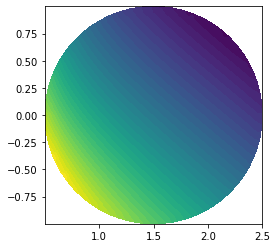

In [18]:
plot(du11)
plt.show()